<a href="https://colab.research.google.com/github/LittlePanther-Susie/Notebook-Publish/blob/main/3%20-%20Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics of Logistic Regression

Logistic regression is one of the most popular classification methods. Its name contains 'regression', but it is popular as a classification method. Why? Let's visit the foundations of logistic regression with a simple example.

A logistic regression is used to to estimate the probability of an event. Suppose you have a dataset of independent variables and corresponding event occurance. For example, a dataset about the hours of studying as the independent variable and pass/fail for exam as the outcome event.

| **Hours** |  0.5 | 0.75 |   1  | 1.25 |  1.5 | 1.75 | 1.75 |   2  | 2.25 |  2.5 | 2.75 |   3  | 3.25 |  3.5 |   4  | 4.25 |  4.5 | 4.75 |   5  |  5.5 |
|:---------:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|
|  **P/F**  | Fail | Fail | Fail | Fail | Fail | Fail | Pass | Fail | Pass | Fail | Pass | Fail | Pass | Fail | Pass | Pass | Pass | Pass | Pass | Pass |

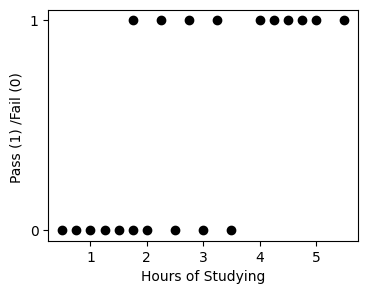

In [1]:
# Data
import numpy as np
Hours = np.array([.5, .75, 1, 1.25, 1.5, 1.75, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 4, 4.25, 4.5, 4.75, 5, 5.5]).reshape(-1, 1)
Pass = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# plot figure
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(Hours, Pass, 'ok')
ax.set_xlabel('Hours of Studying')
ax.set_ylabel('Pass (1) /Fail (0) ')
ax.set_yticks([0, 1])
plt.show()

Let's say you spent X-hours to prepare the exam. What is the probability to pass the exam? The logistic regression can be used to quantify the probability of discrete events at given independent variables.

## Logistic Distribution

The logistic regression starts from the logistic distribution. The CDF is described as
$$F(x,\mu,s) = {1\over 1+e^{-(x-\mu)/s}}$$
$\mu$ is the mean (location parameter) and *s* is a scale parameter where *s > 0*.
The CDF can be rewritten as the logistic function as
$$p(x) = {1\over 1+e^{-{(\beta_0+\beta_1 x)}}} $$
where $\beta_0=-\mu/s$ (intercept) and $\beta_1=1/s$ (rate parameter).
Why did we re-write the CDF of logistic distribution to the logistic function? Notice there is a familiar inear model, $\beta_0+\beta_1 x$. As you can probably tell, it is a huge benefit in regression modeling and its interpretation.

## Optimization

Now, everything is ready. The dataset (Hours of study and pass/fail result) and the logistic function to connect the dataset and the probability. So, the only unknown is the parameters of the logistic function. We should estimate the parameter values ($\beta{_0}$ and $\beta{_1}$) representing the dataset with the probability model the most by solving an optimization problem.

The cost function of the optimization problem can be defined with the sum of Log-loss function as below to measure the goodness of fit.

$$Loss(y_k, p_k) = -(y_k \ln (p_k) + (1 - y_k) \ln (1 - p_k))$$

The parameters can be obtained by minimizing the sum of the Log-loss values at the given dataset. This method is equivalent to the popular maximum likelihood estimation (MLE), which is to determine the parameters maximizing the joint likelihood.

$$Likelihood(y_k, p_k) = \prod_{k:y_k=1}p_k\,\prod_{k:y_k=0}(1-p_k)$$

As the optimization algorithm, BFGS is used as the default method in Scikit-learn's logistic regression.

## Logistic Regression with Scikit-learn

In [2]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

clf = LogisticRegression(random_state=0).fit(Hours, Pass)

print("Regression parameters")
print("  Intercept (beta0): {:.4f}".format(clf.intercept_[0]))
print("  Slope (beta1): {:.4f}".format(clf.coef_[0][0]))

score = clf.score(Hours, Pass)
print(f"Accuracy on Train Data: {score*100:.2f} %")

Regression parameters
  Intercept (beta0): -3.1395
  Slope (beta1): 1.1486
Accuracy on Train Data: 80.00 %


In [3]:
# define logistic function
def LogisticFunction(x, b0, b1):
    p=1/(1+np.exp(-(b0+b1*x)))
    return p

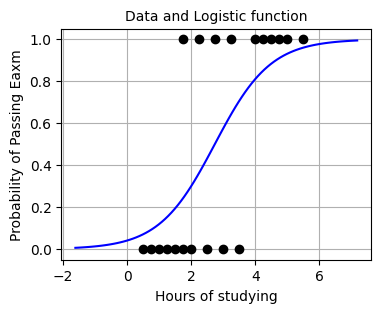

In [4]:
# Plot Data and Logistic Function
b0 = clf.intercept_[0]
b1 = clf.coef_[0][0]

x = np.arange(Hours.mean()-3*Hours.std(), Hours.mean()+3*Hours.std(), 0.1)
p = LogisticFunction(x, b0, b1)

predictions = clf.predict(Hours)
# find wrong predictions
idx_diff = [i for i, item in enumerate(predictions) if item!=Pass[i]]

# plot figure
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(Hours, Pass, 'ok')
ax.set_xlabel('Hours of studying')
ax.set_ylabel('Probability of Passing Eaxm')
ax.plot(x,p,'-b')
ax.set_title('Data and Logistic function', fontsize='10')
plt.grid()
plt.show()

In [5]:
proba = clf.predict_proba(Hours)
LogL = -metrics.log_loss(Pass, proba)
print("Log-Likelihood at the optimum: {:.4f}".format(LogL))

Log-Likelihood at the optimum: -0.4109


At each test point, the logistic function returns the probability of each event (Pass/Fail). If $p(x)>0.5$, it is classified as 'Pass'. If not, 'Fail'.

In [6]:
import pandas as pd

predictions = clf.predict(Hours)
# find predictions
idx_correct = [i for i, item in enumerate(predictions) if item==Pass[i]]
idx_wrong = [i for i, item in enumerate(predictions) if item!=Pass[i]]

summary = {'Hours': Hours.ravel(), 'Pass/Fail': Pass, 'Prediction':predictions ,'Probability of Fail':clf.predict_proba(Hours)[:,0], 'Probability of Pass':clf.predict_proba(Hours)[:,1]}
df = pd.DataFrame(summary)
df

,Hours,Pass/Fail,Prediction,Probability of Fail,Probability of Pass
0,0.50,0,0,0.928590,0.071410
1,0.75,0,0,0.907045,0.092955
2,1.00,0,0,0.879840,0.120160
3,1.25,0,0,0.846026,0.153974
4,1.50,0,0,0.804808,0.195192
5,1.75,0,0,0.755741,0.244259
6,1.75,1,0,0.755741,0.244259
7,2.00,0,0,0.698953,0.301047
8,2.25,1,0,0.635333,0.364667
9,2.50,0,0,0.566605,0.433395


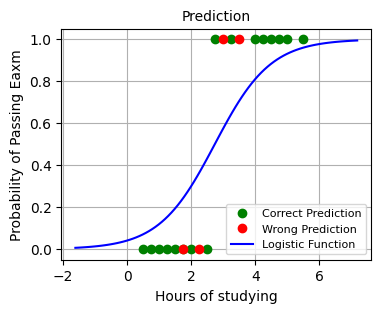

In [7]:
# plot figure
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(4,3))
ax.set_xlabel('Hours of studying')
ax.set_ylabel('Probability of Passing Eaxm')
ax.plot(Hours[idx_correct],predictions[idx_correct], 'og')
ax.plot(Hours[idx_diff],predictions[idx_diff],'or')
ax.plot(x,p,'-b')
ax.legend(['Correct Prediction','Wrong Prediction','Logistic Function'], loc='lower right', fontsize='8')
ax.set_title('Prediction', fontsize='10')
plt.grid()
plt.show()

Confusion Matrix

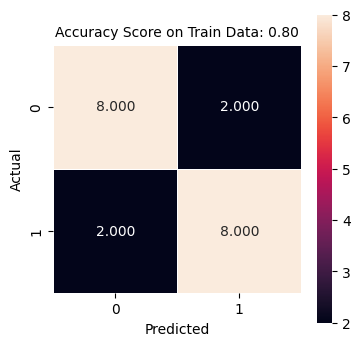

In [8]:
# Plot confusion matrix
import seaborn as sns
from matplotlib import pyplot as plt

cm = metrics.confusion_matrix(Pass, predictions)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Accuracy Score on Train Data: {:.2f}'.format(score)
plt.title(all_sample_title, size = 10)
plt.show()

There are two false positive and two false negative.

## References


https://en.wikipedia.org/wiki/Logistic_distribution

https://en.wikipedia.org/wiki/Logit

https://en.wikipedia.org/wiki/Logistic_regression

https://en.wikipedia.org/wiki/Probit

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html